In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly.express as px
from tabulate import tabulate

In [159]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data Loading and Preparation

In [144]:
df = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')

<ipython-input-144-bf064d4dac3d>:1: DtypeWarning:

Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [145]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [225]:
# Rename columns for readability
df.rename(columns={
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'latitude': 'Latitude',
    'longitude': 'Longitude',
    'attacktype1_txt': 'AttackType',
    'nkill': 'Killed',
    'nwound': 'Wounded',
    'summary': 'Summary',
    'gname': 'TerroristGroup',
    'targtype1_txt': 'TargetType',
    'natlty1_txt': 'TargetNationality',
    'nperps': 'TerroristNumber',
    'weaptype1_txt': 'WeaponType',
    'motive': 'Motive'
}, inplace=True)

In [224]:
# Select relevant columns
df = df[['Year', 'Month', 'Day', 'Country', 'Region', 'Latitude', 'Longitude', 'AttackType', 'Killed', 'Wounded', 'Summary', 'TerroristGroup', 'TerroristNumber', 'WeaponType', 'TargetType', 'TargetNationality', 'Motive']]

In [149]:
df.head()

,Year,Month,Day,Country,Region,Latitude,Longitude,AttackType,Killed,Wounded,Summary,TerroristGroup,TerroristNumber,WeaponType,TargetType,TargetNationality,Motive
0,1970,7,2,Dominican Republic,Central America & Caribbean,18.456792,-69.951164,Assassination,1.0,0.0,NaN,MANO-D,NaN,Unknown,Private Citizens & Property,Dominican Republic,NaN
1,1970,0,0,Mexico,North America,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,NaN,23rd of September Communist League,7.0,Unknown,Government (Diplomatic),Belgium,NaN
2,1970,1,0,Philippines,Southeast Asia,15.478598,120.599741,Assassination,1.0,0.0,NaN,Unknown,NaN,Unknown,Journalists & Media,United States,NaN
3,1970,1,0,Greece,Western Europe,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,Unknown,NaN,Explosives,Government (Diplomatic),United States,NaN
4,1970,1,0,Japan,East Asia,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,Unknown,NaN,Incendiary,Government (Diplomatic),United States,NaN


In [150]:
df.isnull().sum()

,0
Year,0
Month,0
Day,0
Country,0
Region,0
Latitude,4556
Longitude,4557
AttackType,0
Killed,10313
Wounded,16311


## Exploratory Data Analysis (EDA)

In [165]:
# Function for count plots
def create_countplot(data, x=None, y=None, order=None, title=None, xlabel=None, ylabel=None, figsize=(15,5), rotation=0):
    plt.subplots(figsize=figsize)
    sns.countplot(x=x, y=y, data=data, order=order, edgecolor='black', palette='mako', legend=False)
    plt.title(title, fontsize=16, fontweight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=rotation)
    plt.show()

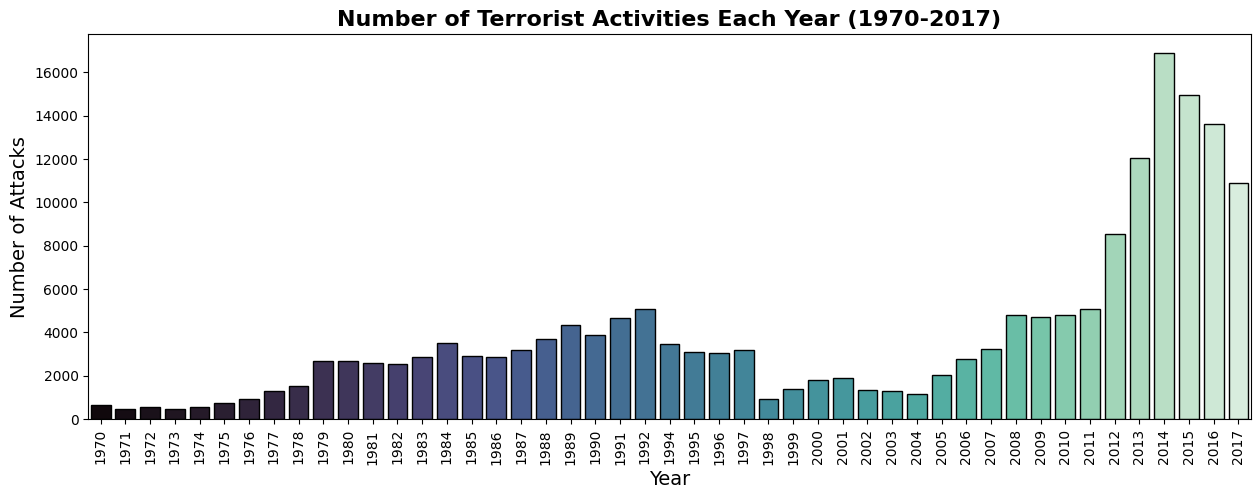

In [162]:
# Number of terrorist activities each year
create_countplot(df, x='Year', title='Number of Terrorist Activities Each Year (1970-2017)', xlabel='Year', ylabel='Number of Attacks', rotation=90)

The plot shows a significant increase in terrorist activities starting from the early 2000s, peaking around 2014-2015.

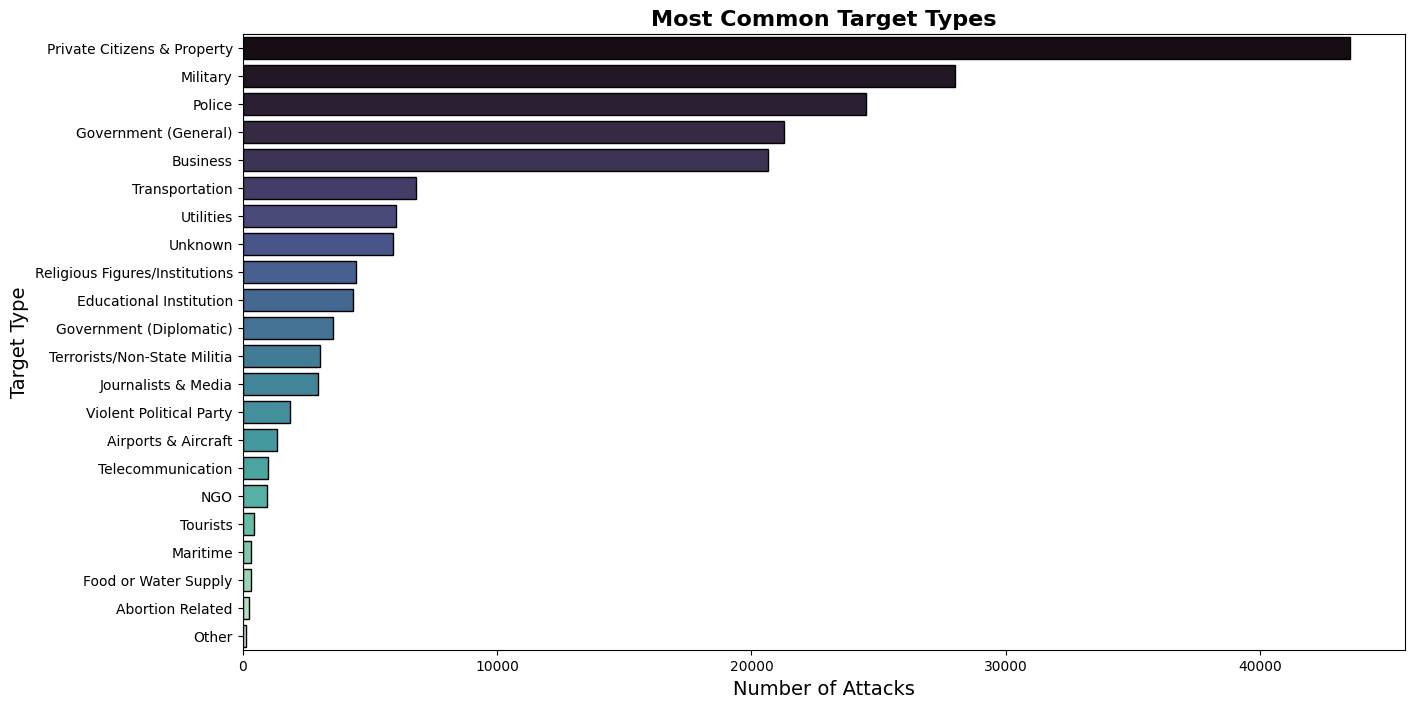

In [166]:
# Most common target types
create_countplot(df, y='TargetType', order=df['TargetType'].value_counts().index, title='Most Common Target Types', xlabel='Number of Attacks', ylabel='Target Type', figsize=(15,8))

Civilians and private property are the most common targets, followed by government and military targets.

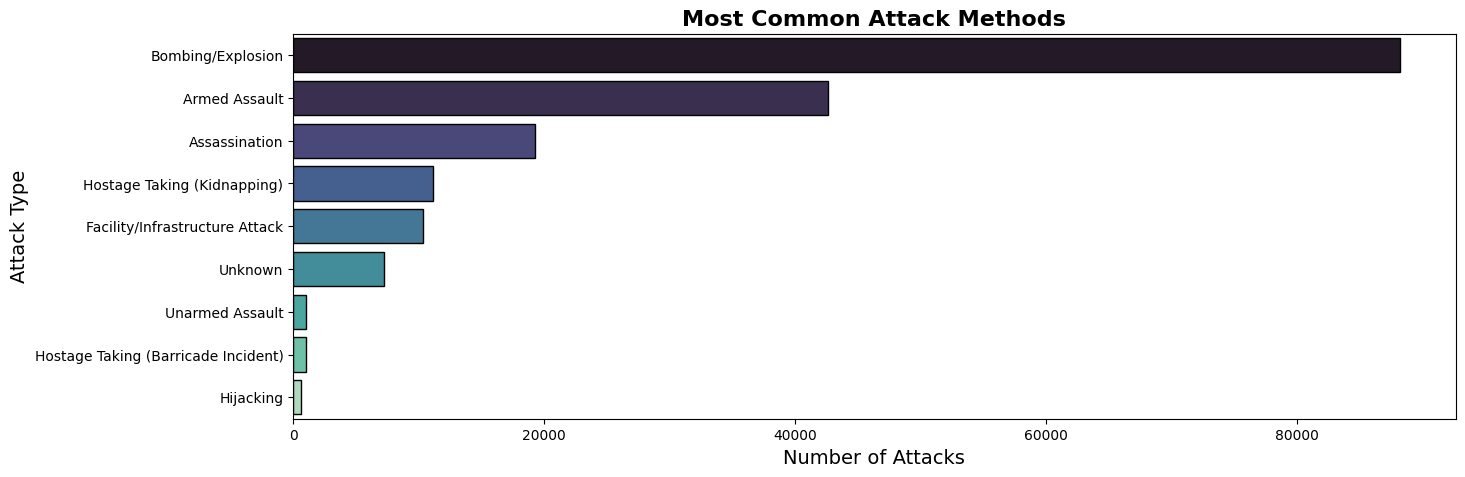

In [168]:
# Most common attack methods
create_countplot(df, y='AttackType', order=df['AttackType'].value_counts().index, title='Most Common Attack Methods', xlabel='Number of Attacks', ylabel='Attack Type')

Bombings/Explosions are the most common attack method, followed by armed assaults.

### Terrorist Attacks by Region

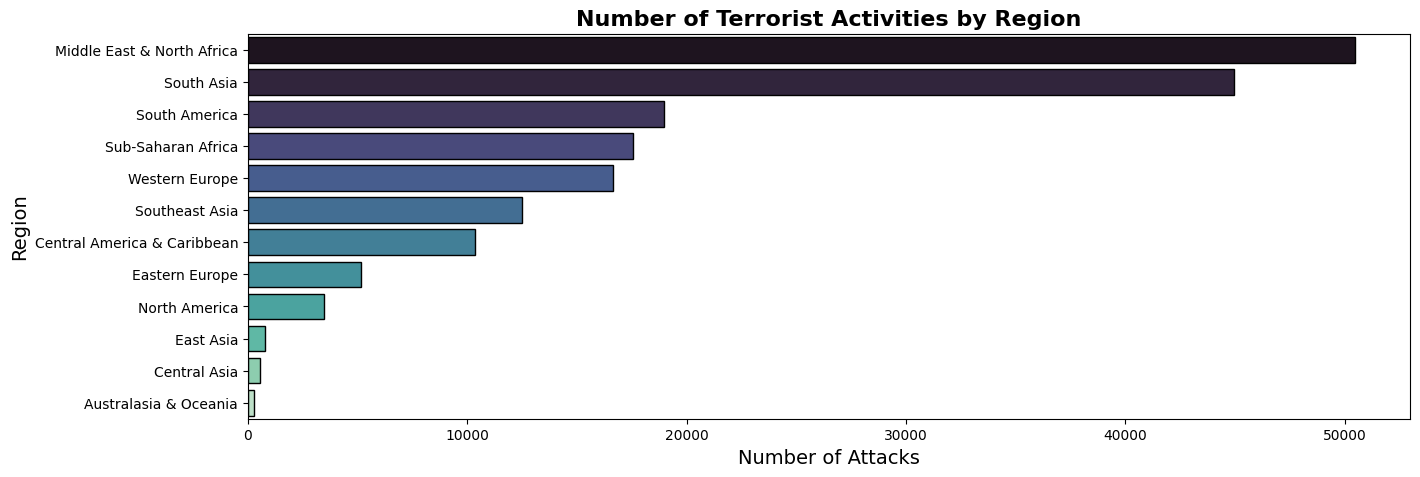

In [171]:
# Number of terrorist activities by region
create_countplot(df, y='Region', order=df['Region'].value_counts().index, title='Number of Terrorist Activities by Region', xlabel='Number of Attacks', ylabel='Region')

The Middle East & North Africa region experiences the highest number of terrorist attacks, followed by South Asia and South America.

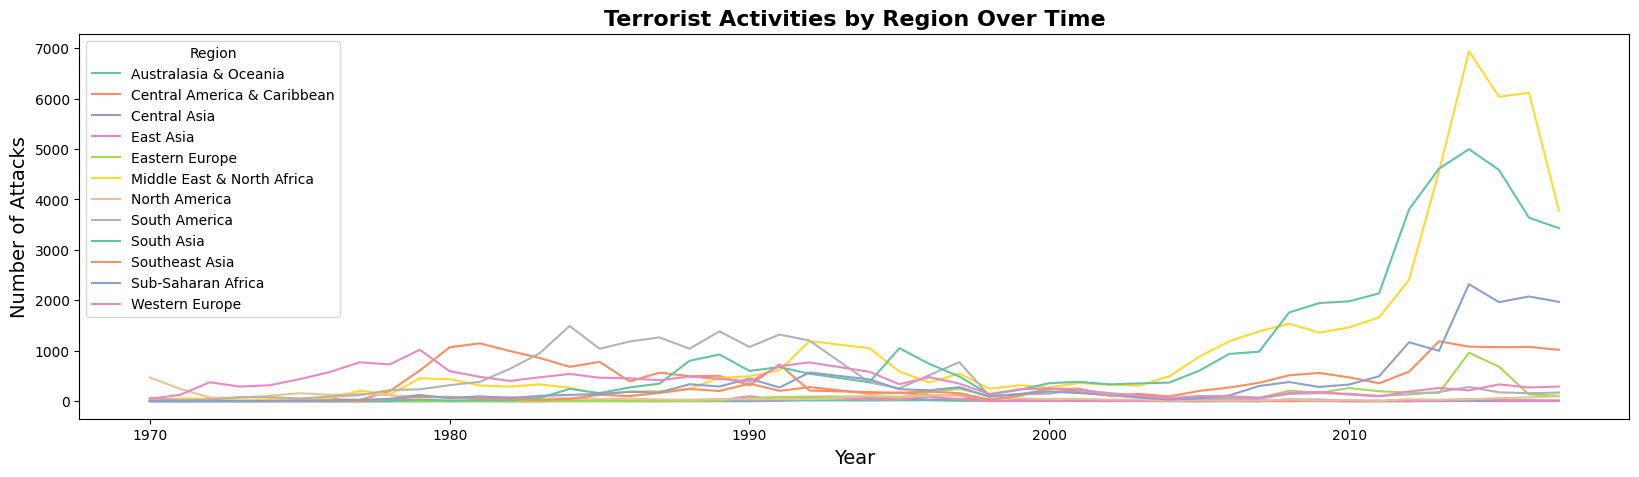

In [172]:
# Terrorist activities by region over time
terrorist_region = pd.crosstab(df.Year, df.Region)
terrorist_region.plot(color=sns.color_palette('Set2', df.Region.nunique()))
plt.title('Terrorist Activities by Region Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
fig = plt.gcf()
fig.set_size_inches(20,5)
plt.show()

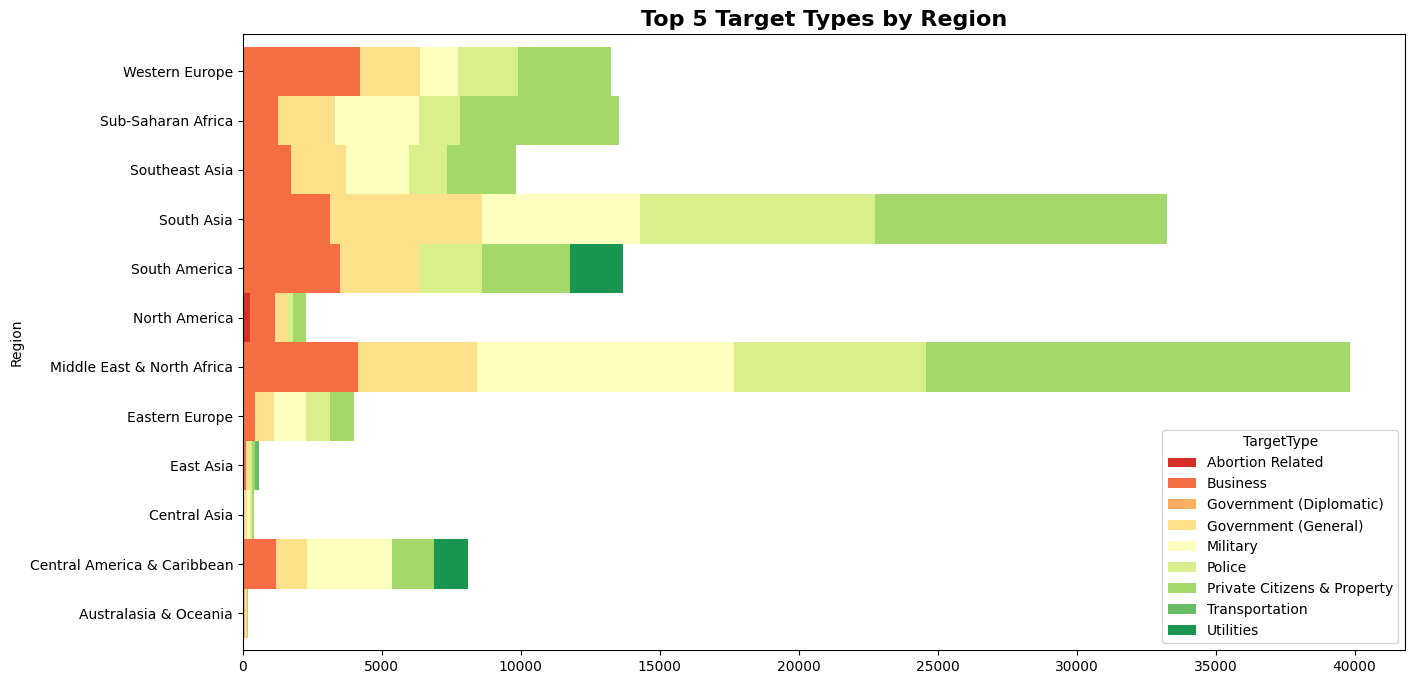

In [181]:
# Top 5 target types by region
target_region = df.groupby('Region')['TargetType'].value_counts().groupby(level=0).head(5).reset_index(name='count')
df_target_region = df[df.set_index(['Region', 'TargetType']).index.isin(target_region.set_index(['Region', 'TargetType']).index)]

pd.crosstab(df_target_region.Region, df_target_region.TargetType).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn', 9))
plt.title('Top 5 Target Types by Region', fontsize=16, fontweight='bold')
plt.gcf().set_size_inches(15,8)
plt.show()

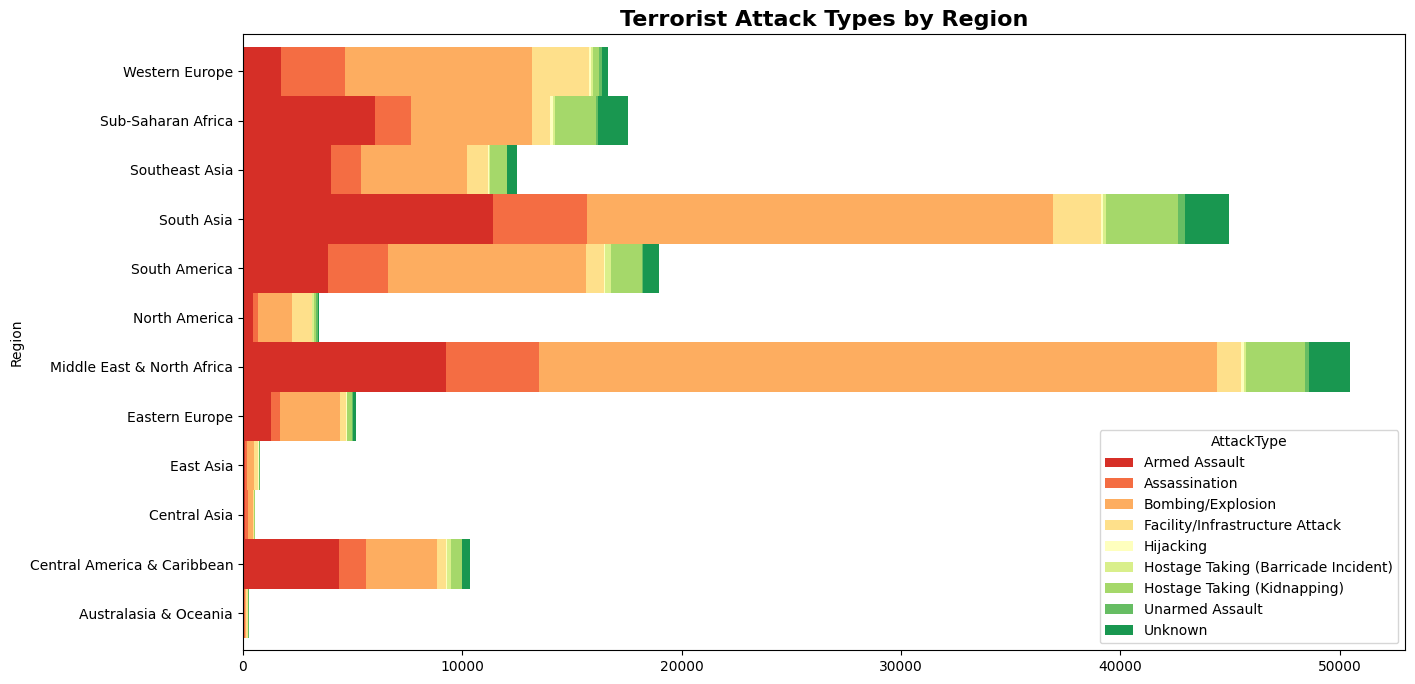

In [184]:
# Terrorist attack types by region
pd.crosstab(df.Region, df.AttackType).plot.barh(stacked=True, width=1, color=sns.color_palette('RdYlGn', 9))
plt.title('Terrorist Attack Types by Region', fontsize=16, fontweight='bold')
plt.gcf().set_size_inches(15,8)
plt.show()

### Terrorist Attacks by Country

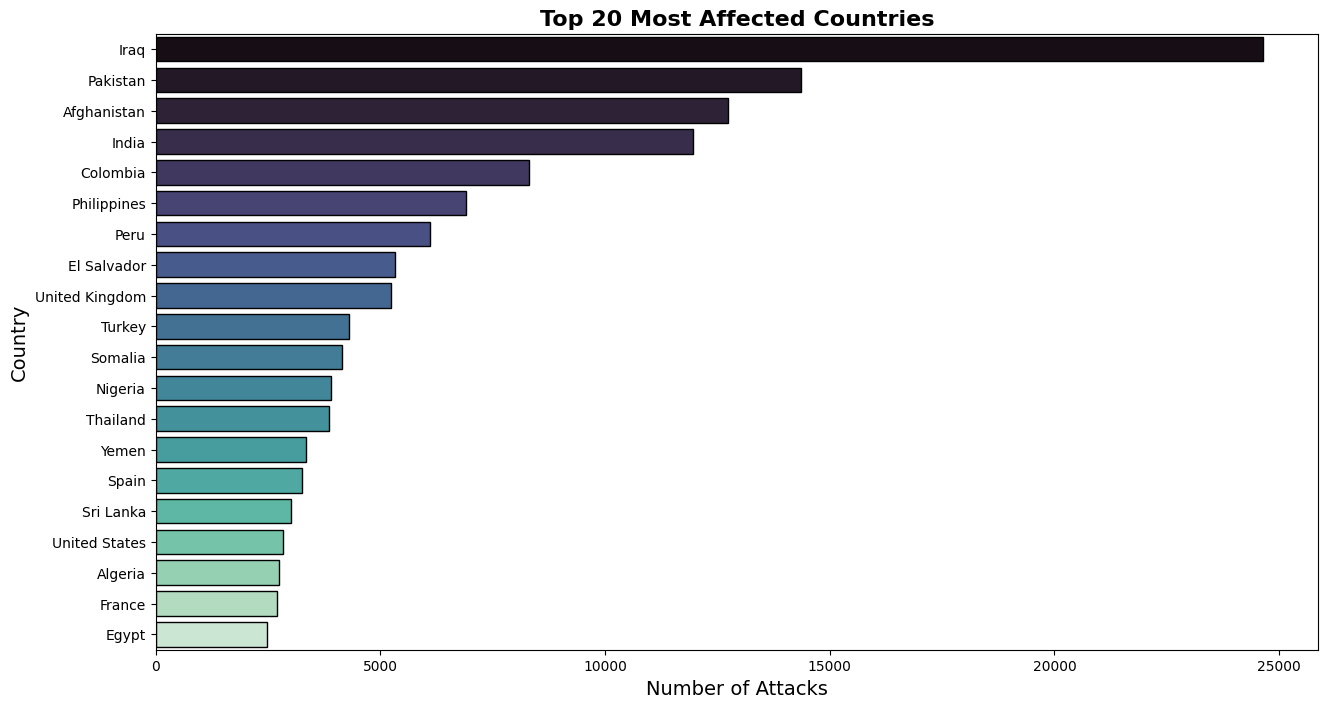

In [201]:
# Top 20 most affected countries
top_20_countries = df['Country'].value_counts().head(20)

plt.subplots(figsize=(15,8))
sns.barplot(x=top_20_countries.values, y=top_20_countries.index, edgecolor='black', palette='mako')
plt.title('Top 20 Most Affected Countries', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

Iraq, Pakistan, and Afghanistan are the most affected countries, likely due to ongoing conflicts and the presence of extremist groups.

In [199]:
# Intensity of terrorist attacks by country
intensity_by_country = df.groupby('Country').agg({'Killed': 'sum', 'Wounded': 'sum'}).reset_index()

fig = px.scatter_geo(
    intensity_by_country,
    locations='Country',
    locationmode='country names',
    size='Killed',
    color='Wounded',
    hover_name='Country',
    hover_data={'Killed': True, 'Wounded': True},
    title='Interactive Intensity Map of Terrorist Attacks by Country (Killed and Wounded)',
    color_continuous_scale='RdYlGn_r',
    projection='natural earth'
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='gray',
        landcolor='lightgray',
    )
)

fig.show()

### Terrorist Attacks by Terrorist Groups

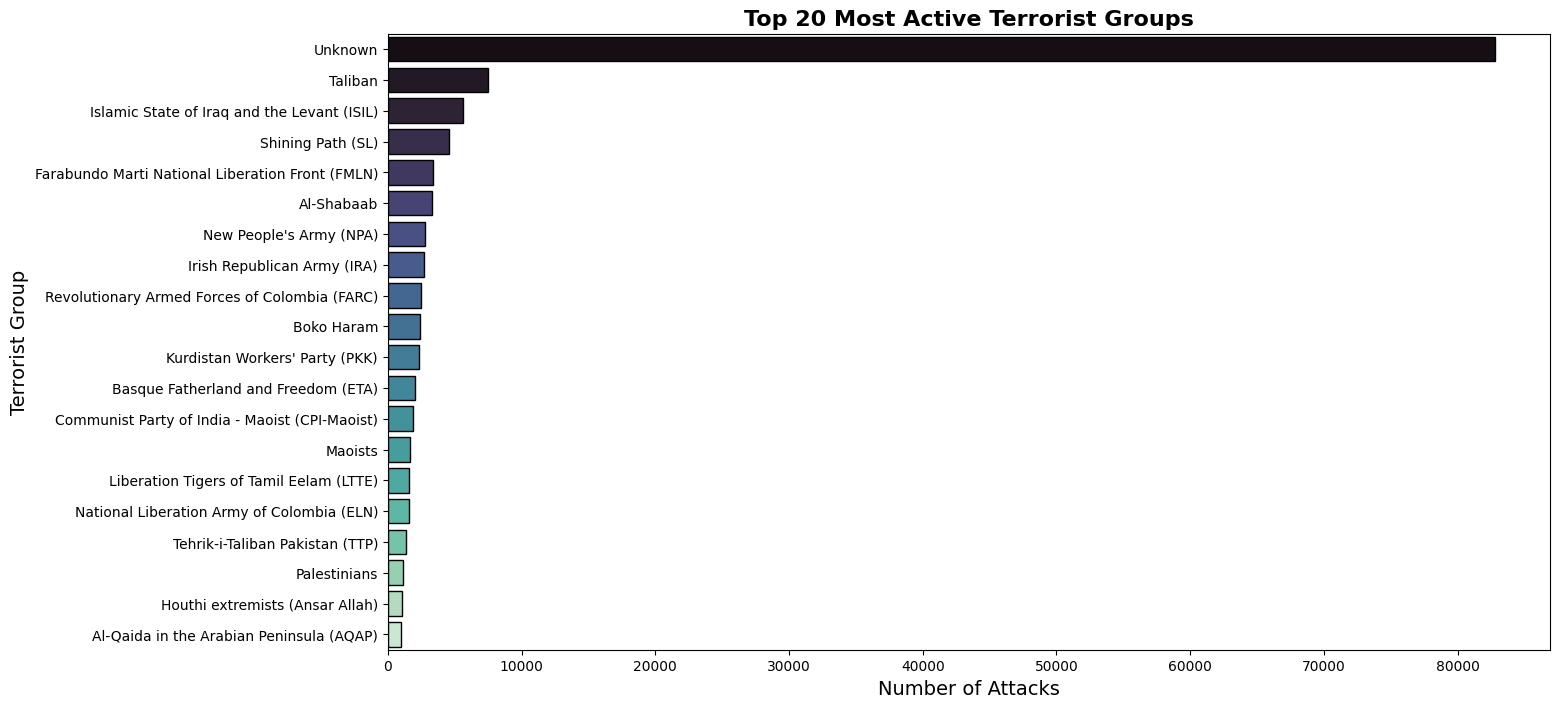

In [210]:
# Top 20 most active terrorist groups
top_20_groups = df['TerroristGroup'].value_counts().head(20).reset_index()
top_20_groups.columns = ['TerroristGroup', 'AttackCount']

plt.subplots(figsize=(15,8))
sns.barplot(x='AttackCount', y='TerroristGroup', data=top_20_groups, edgecolor='black', palette='mako')
plt.title('Top 20 Most Active Terrorist Groups', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Terrorist Group', fontsize=14)
plt.show()

The significant presence of "Unknown" groups in the graph highlights the challenges in attributing responsibility for certain attacks.

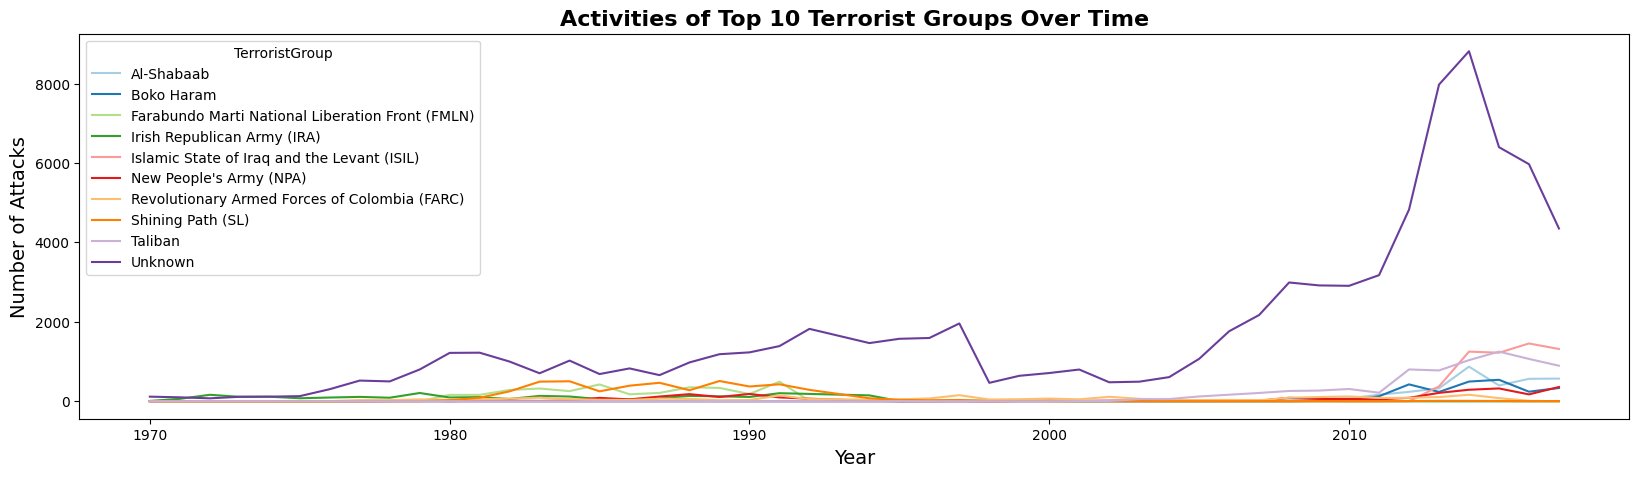

In [211]:
# Activities of top 10 terrorist groups over time
terrorist_group = df[df['TerroristGroup'].isin(df['TerroristGroup'].value_counts()[:10].index)]
pd.crosstab(terrorist_group.Year, terrorist_group.TerroristGroup).plot(color=sns.color_palette('Paired', df.TerroristGroup.nunique()))
plt.title('Activities of Top 10 Terrorist Groups Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Attacks', fontsize=14)
plt.gcf().set_size_inches(20,5)
plt.show()

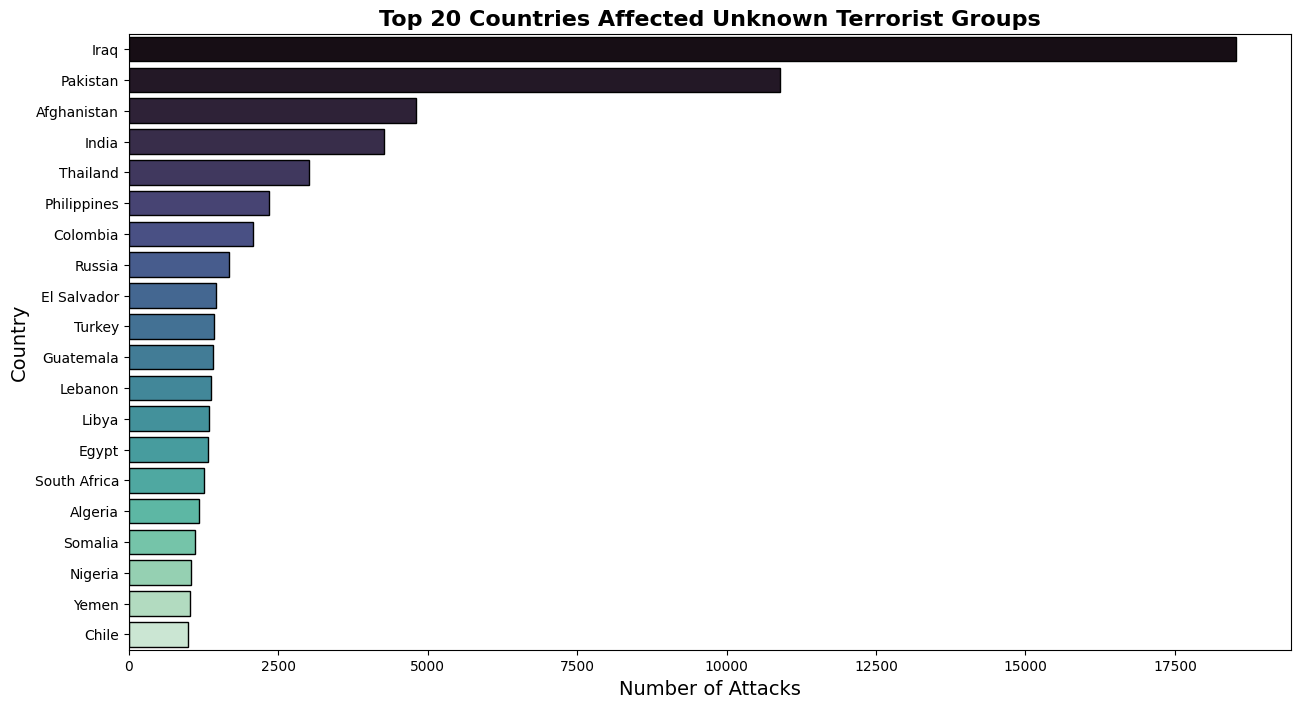

In [244]:
# Top 20 countries affected by unknown terrorist groups
unknown_attacks = df[df['TerroristGroup'] == 'Unknown']
top_unknown_countries = unknown_attacks['Country'].value_counts().head(20)

plt.subplots(figsize=(15,8))
sns.barplot(x=top_unknown_countries.values, y=top_unknown_countries.index, palette='mako', edgecolor='black')
plt.title('Top 20 Countries Affected Unknown Terrorist Groups', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

### Terrorist Attacks by Casualties

In [247]:
# Attackes with most casualties
df['TotalCasualties'] = df['Killed'] + df['Wounded']
top_20_attacks = df.nlargest(20, 'TotalCasualties')

In [252]:
fig = px.scatter(
    top_20_attacks,
    x='Killed',
    y='Wounded',
    hover_name='TerroristGroup',
    hover_data=['Country', 'Region', 'TotalCasualties'],
    title='Top 20 Terrorist Attacks by Casualties (Killed and Wounded)',
    labels={
        'Killed': 'Number of Killed',
        'Wounded': 'Number of Wounded'
    }
)

fig.update_layout(
    title_font_size=20,
    title_font_color='darkblue',
    title_x=0.5,
    xaxis_title='Number of Killed',
    yaxis_title='Number of Wounded',
    hovermode='closest'
)

fig.show()

The top 20 terrorist attacks with the highest casualties are dominated by Al-Qaida, responsible for the 2001 U.S. attack (9,574 casualties) and attacks in Kenya and Iraq. Other notable groups include Hutu extremists (Rwanda, 1994), ISIS, Aum Shinri Kyo (Japan, 1995), and anti-government extremists in the U.S. These attacks highlight the global reach and devastating impact of terrorism across diverse regions and time periods.

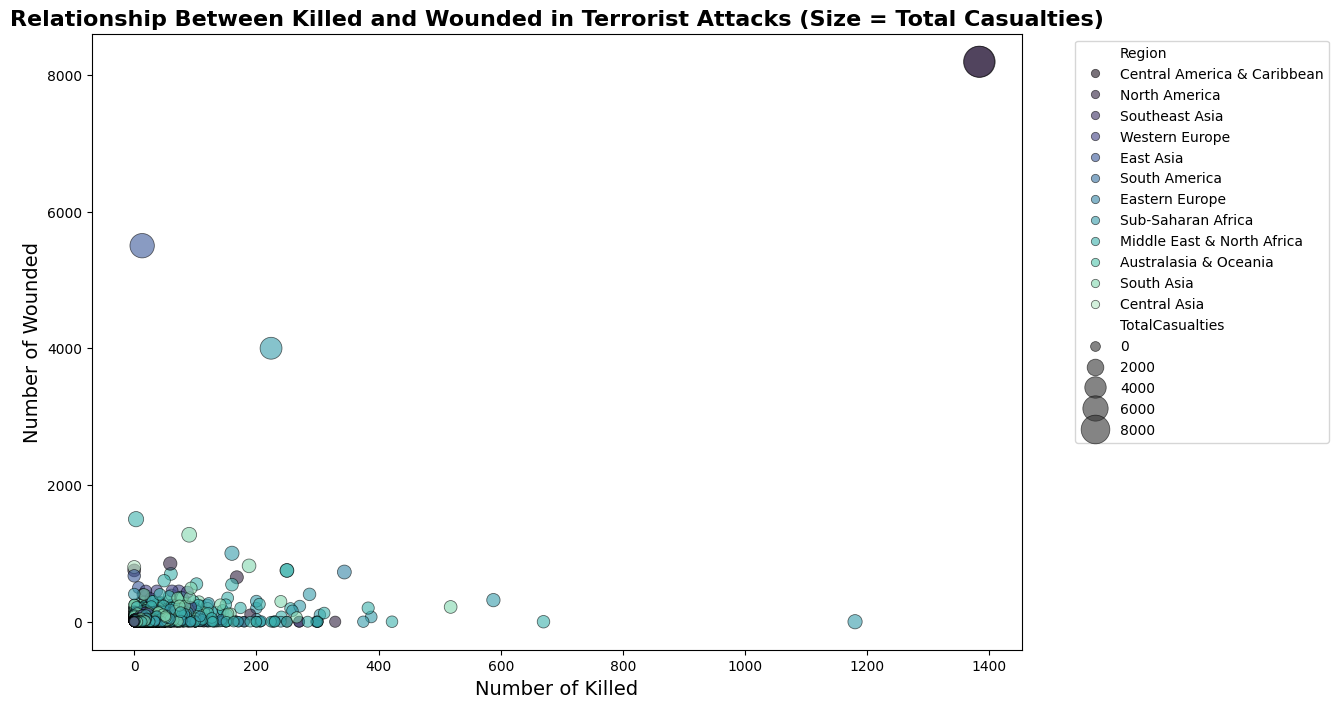

In [249]:
# Relationship between killed and wounded in terrorist attacks

plt.figure(figsize=(12,8))
sns.scatterplot(
    x='Killed',
    y='Wounded',
    hue='Region',
    size='TotalCasualties',
    sizes=(50,500),
    data=df,
    palette='mako',
    alpha=0.6,
    edgecolor='black'
)

plt.title('Relationship Between Killed and Wounded in Terrorist Attacks (Size = Total Casualties)', fontsize=16, fontweight='bold')
plt.xlabel('Number of Killed', fontsize=14)
plt.ylabel('Number of Wounded', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Terrorist Activities Related to Anti-abortion

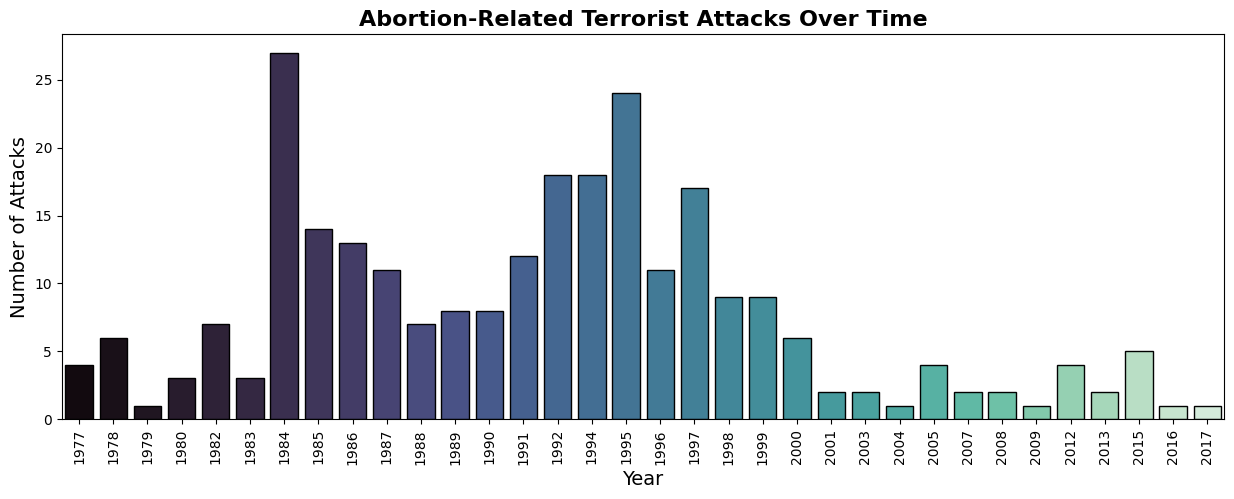

In [233]:
# Abortion-related terrorist attacks over time
abortion_attacks = df[df['TargetType'] == 'Abortion Related']

create_countplot(abortion_attacks, x='Year', title='Abortion-Related Terrorist Attacks Over Time', xlabel='Year', ylabel='Number of Attacks', rotation=90)

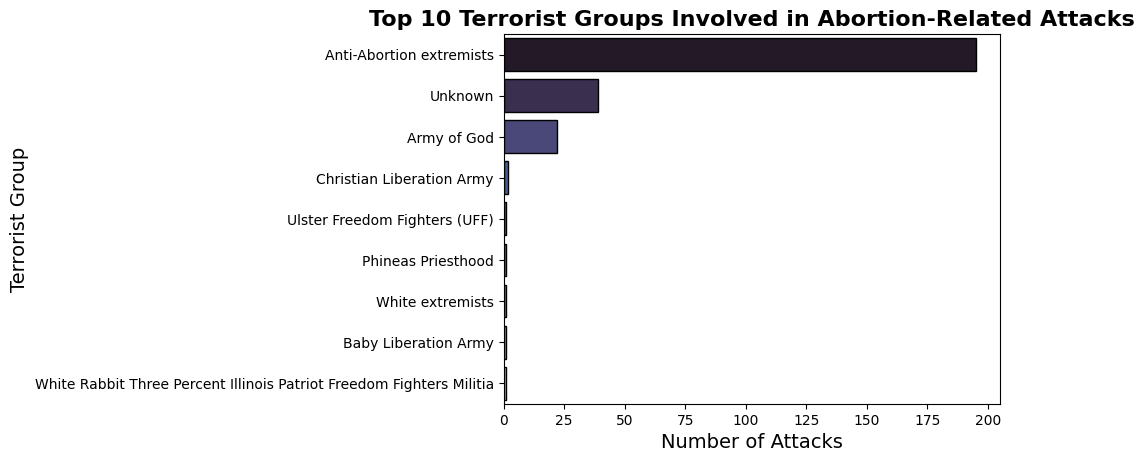

In [232]:
# Top 10 terrorist troups involved in abortion-related attacks
top_abortion_groups = abortion_attacks['TerroristGroup'].value_counts().head(10)
sns.barplot(x=top_abortion_groups.values, y=top_abortion_groups.index, palette='mako', edgecolor='black')
plt.title('Top 10 Terrorist Groups Involved in Abortion-Related Attacks', fontsize=16, fontweight='bold')
plt.xlabel('Number of Attacks', fontsize=14)
plt.ylabel('Terrorist Group', fontsize=14)
plt.show()

In [234]:
# Interactive map of terrorist attacks related to anti-abortion
fig = px.scatter_geo(
    abortion_attacks,
    lat='Latitude',
    lon='Longitude',
    hover_name='Country',
    hover_data=['Year', 'AttackType', 'TargetType'],
    title='Interactive Map of Terrorist Attacks Related to Anti-Abortion',
    projection='natural earth'
)

fig.update_layout(
    title_font_size=20,
    title_x=0.5,
    geo=dict(
        showframe=False,
        showcoastlines=True,
        coastlinecolor='gray',
        landcolor='lightgray',
    )
)

fig.show()

Abortion-related attacks are concentrated in the United States, carried out by extremist groups to target clinics and healthcare providers.